# Emulator Testing
I am running the emulator on the given data and predicting the FOM values for all the 36 scenarios. Results are shown as the plots of predicted FOM vs given FOM and percentage error in prediction for each scenario. 

In [1]:
import george
import numpy as np
import matplotlib.pyplot as pl
from george import kernels
from scipy.optimize import minimize
from george.metrics import Metric
%matplotlib inline

In [2]:
a = np.loadtxt("parameters_with_FOM.txt")

In [3]:
area = a[:,0]
depth = a[:,1]
shear_m = a[:,2]
sigma_z = a[:,3]
sig_delta_z = a[:,4]
sig_sigma_z= a[:,5]
FOM = a[:,6]
#slicing up the array in 7 column arrays

In [4]:
Sarea = (area-np.mean(area))/np.std(area)
Sdepth = (depth-np.mean(depth))/np.std(depth)
Sshear_m = (shear_m-np.mean(shear_m))/np.std(shear_m)
Ssigma_z = (sigma_z-np.mean(sigma_z))/np.std(sigma_z)
Ssig_delta_z = (sig_delta_z-np.mean(sig_delta_z))/np.std(sig_delta_z)
Ssig_sigma_z = (sig_sigma_z-np.mean(sig_sigma_z))/np.std(sig_sigma_z)
SFOM = (FOM-np.mean(FOM))/np.std(FOM)
#standardizing the data

In [5]:
x = np.column_stack([Sarea, Sdepth, Sshear_m, Ssigma_z, Ssig_delta_z, Ssig_sigma_z])
#Putting together standardised parameter array

In [6]:
ArrayPFOM = []
#Empty array in which I will 'extend' every predicted FOM value from loop 

In [7]:
kernel = kernels.ExpSquaredKernel(metric=[1,1,1,1,1,1], ndim=6)
#creating a kernel-covariance in 6-D parameter space

In [8]:
gp = george.GP(kernel, mean=np.mean(SFOM))

In [9]:
for i in range (0,36):
    #creating a loop
    X = np.delete(x, i, axis=0)
    sfom = np.delete(SFOM, i, axis=0)  
               #deletes 1 raw everytime the loop runs from first to last
    y = np.take(x, [i], axis=0)
               #takes 1 raw everytime the loop runs from first to last
    
    gp.compute(X)
    def neg_ln_lik(p):
            gp.set_parameter_vector(p)
            return -gp.log_likelihood(sfom) 
    def grad_neg_ln_like(p):
            gp.set_parameter_vector(p)
            return -gp.grad_log_likelihood(sfom) 
    result = minimize(neg_ln_lik, gp.get_parameter_vector(), jac=grad_neg_ln_like)
    gp.set_parameter_vector(result.x)
    #running Gaussian process
    
    PSFOM, DY = gp.predict(sfom, y)
    #prediction of test point
    
    PFOM = (PSFOM*np.std(FOM))+np.mean(FOM)
    #De-standerdising predicted standardised FOM value
    
    ArrayPFOM.extend(PFOM)
    #Building an array of predicted FOM

In [10]:
ArrayPFOM
#Predicted FOM values

[7674.464644349838,
 14839.948440488764,
 9983.244902103364,
 8638.642180862982,
 17735.29481094126,
 15177.218819242953,
 9798.502384041834,
 8388.134341010164,
 9586.684553239345,
 18382.745034058178,
 12918.58120463984,
 17468.937611002057,
 19832.99319292966,
 12590.302591892269,
 15312.691760113537,
 16591.039618202467,
 19690.426533917882,
 11166.303287042418,
 10437.527170274647,
 16193.169998033183,
 18971.46713436113,
 18027.23050927425,
 11403.920293650528,
 9267.678544722225,
 16963.129768981693,
 12046.368370794497,
 16251.550411087392,
 14445.839887973003,
 8187.481109785924,
 13563.057110260348,
 19174.07071734478,
 15735.142795189166,
 12064.92905004202,
 14112.25664808869,
 10971.47871214271,
 13265.214698547548]

Text(0, 0.5, 'FOM Predicted with Emulator')

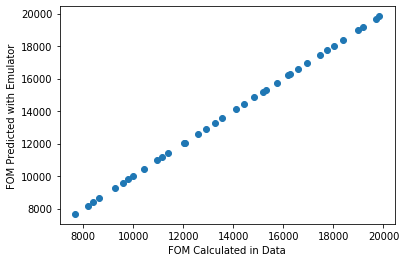

In [11]:
pl.scatter(FOM, ArrayPFOM)
pl.xlabel('FOM Calculated in Data')
pl.ylabel('FOM Predicted with Emulator')
#Predicted FOM vs Given FOM 

In [12]:
Precision = (ArrayPFOM-FOM)*100/FOM
#Calculating percentage error between predicted and given data

In [13]:
Scenario = np.arange(36).transpose()

Text(0, 0.5, 'Percentage error in prediction')

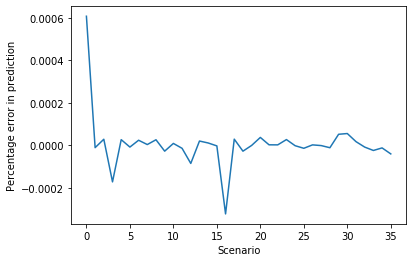

In [14]:
pl.plot(Scenario, Precision)
pl.xlabel('Scenario')
pl.ylabel('Percentage error in prediction')
#percentage error in prediction vs 36-scenarioes

In [17]:
avg_precision = np.mean(Precision)
avg_precision

5.890618776676191e-06